# Preliminary Wrangling

In [1]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Load data from csv file
df_salaries = pd.read_csv('salaries.csv')

#display the shape of the data
print(df_salaries.shape)

#output random samples
df_salaries.sample(20)

(1332, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
592,2022,SE,FT,Data Scientist,123400,USD,123400,US,0,US,M
1281,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
352,2022,MI,FT,Data Scientist,83000,GBP,102799,GB,100,GB,M
1034,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
386,2021,EN,FT,Machine Learning Research Engineer,20000,USD,20000,FR,50,FR,M
1250,2021,SE,FT,Machine Learning Scientist,225000,USD,225000,US,100,CA,L
1044,2022,EN,FT,Data Analytics Engineer,20000,USD,20000,PK,0,PK,M
1161,2021,EN,FT,Data Scientist,2100000,INR,28399,IN,100,IN,M
390,2022,SE,FT,Data Scientist,154000,USD,154000,US,0,US,M
558,2022,SE,FT,Machine Learning Engineer,135000,USD,135000,US,100,US,M


## What is the structure of the dataset?
The dataset contains salaries of 1332 employees for jobs related to data from 2020 to 2022. A total of 11 variables are used to record salaries. The majority of variables are qualitative with both ordered and unordered factor variables.

## What is/are the main feature(s) of interest in your dataset?
This data is primarily intended to help provide better guidance on what's being paid globally. The objective of this study is to determine the factors that contribute to higher salaries and salary trends over time.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
We believe that employee experience has the greatest influence on salary. Salary is also affected by job title_name, job type, year of employment, and company size, but to a lesser extent. Since we are not certain, we will test the correlation between salaries and the other variables (employee residence and company location).

# Data Assessment

In [3]:
df_salaries.head(60)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M
5,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
6,2022,SE,FT,Data Engineer,161000,USD,161000,US,100,US,M
7,2022,SE,FT,Data Engineer,110000,USD,110000,US,100,US,M
8,2022,SE,FT,Data Scientist,136000,USD,136000,US,100,US,M
9,2022,SE,FT,Data Scientist,104000,USD,104000,US,100,US,M


In [4]:
# A brief summary of the data
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


> In our table, there is no null value, and the columns' names do not contain spaces. Despite being able to work with the data types as they are, we will make some modifications: change experience level, company size, and remote ratio to ordered categories, and employment type to unordered categories.

#### Based on a visual examination of the data in a spreadsheet application, I noticed some job title_names had been recorded differently but  were the same

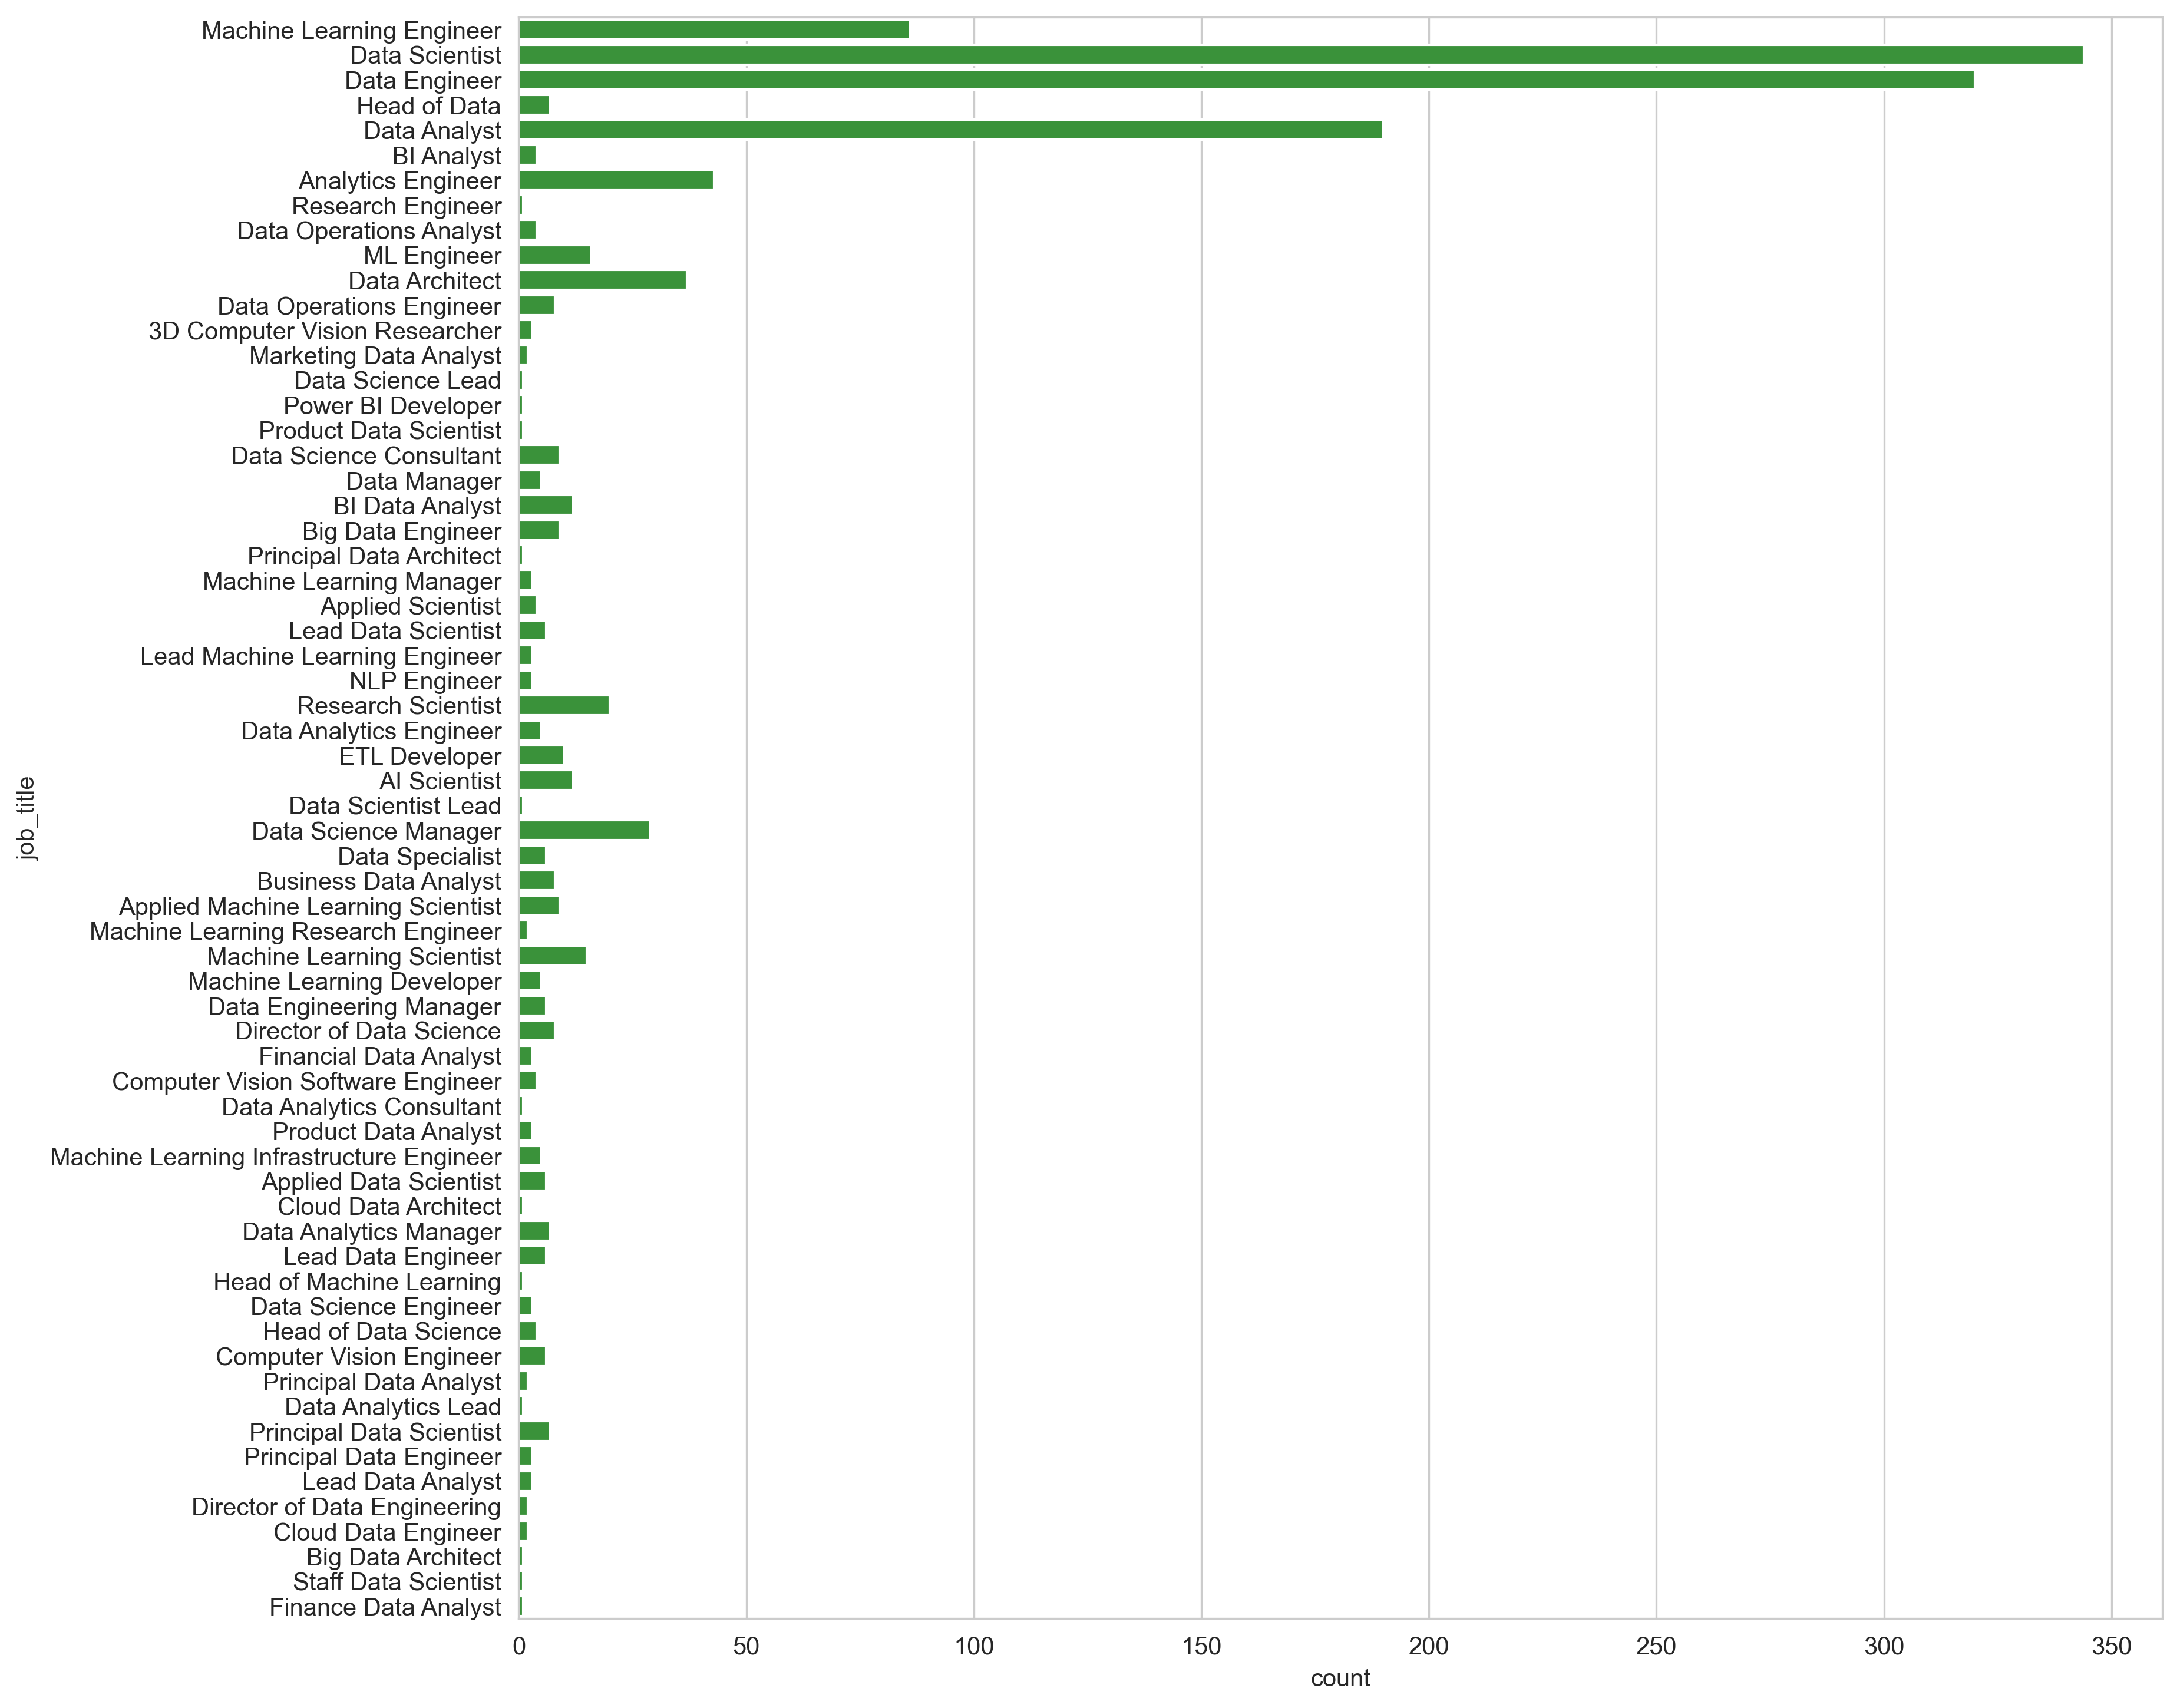

In [5]:
#Displaying the various job title_name entries 
sb.set_style('whitegrid')
plt.figure(figsize=[12,12], dpi=300)
default_color = sb.color_palette()[2]
sb.countplot(data=df_salaries,color=default_color, y='job_title')
plt.show()

>Majority of Machine Learning Engineers were recorded as 'Machine Learning Engineers',
However some entries were also recorded as 'ML Engineer' , 'Applied Machine Learning Scientist',
'Machine Learning Scientist', 'Machine Learning Developer', 'Machine Learning Infrastructure Engineer' etc
The same goes for data scientist, data analyst and data engineer entries

In [6]:
#displaying the Entries with 'ML Engineer'
df_salaries.loc[df_salaries['job_title'] == 'ML Engineer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2022,MI,FT,ML Engineer,180000,USD,180000,US,100,US,M
79,2022,MI,FT,ML Engineer,100000,USD,100000,US,100,US,M
203,2022,MI,FT,ML Engineer,148500,USD,148500,US,100,US,L
204,2022,MI,FT,ML Engineer,98200,USD,98200,US,100,US,L
312,2022,SE,FT,ML Engineer,195400,USD,195400,US,100,US,L
313,2022,SE,FT,ML Engineer,131300,USD,131300,US,100,US,L
341,2022,SE,FT,ML Engineer,130000,USD,130000,US,100,US,M
342,2022,SE,FT,ML Engineer,84000,USD,84000,US,100,US,M
720,2022,SE,FT,ML Engineer,240000,USD,240000,US,0,US,M
721,2022,SE,FT,ML Engineer,160000,USD,160000,US,0,US,M


In [7]:
#Displaying the entries that has the string 'Machine Learning' present
df_salaries.loc[df_salaries['job_title'].str.contains('Machine Learning')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1111,2021,MI,FT,Machine Learning Engineer,40000,EUR,47282,ES,100,ES,S
1269,2021,MI,FT,Machine Learning Engineer,21000,EUR,24823,SI,50,SI,L
542,2022,SE,FT,Machine Learning Engineer,148800,USD,148800,US,100,US,M
619,2022,EN,FT,Machine Learning Engineer,115000,USD,115000,US,50,US,L
533,2022,SE,FT,Machine Learning Infrastructure Engineer,148800,USD,148800,US,100,US,M
744,2022,MI,FT,Machine Learning Engineer,80000,EUR,84229,FR,100,DE,M
231,2022,SE,FT,Machine Learning Manager,150000,USD,150000,US,100,US,M
298,2022,SE,FT,Machine Learning Engineer,210000,USD,210000,US,100,US,M
675,2022,SE,FT,Machine Learning Engineer,100000,USD,100000,US,100,US,M
674,2022,SE,FT,Machine Learning Engineer,180000,USD,180000,US,100,US,M


In [8]:
df_salaries.loc[df_salaries['job_title'].str.contains('Data Analyst')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1311,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IN,L
133,2022,SE,FT,Data Analyst,89200,USD,89200,US,100,US,M
963,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M
768,2022,MI,FT,Data Analyst,40000,EUR,42114,ES,100,ES,M
42,2022,SE,FT,Data Analyst,127000,USD,127000,US,0,US,M
291,2022,SE,FT,Data Analyst,68400,USD,68400,US,100,US,M
673,2022,SE,FT,Data Analyst,93700,USD,93700,US,100,US,M
551,2022,SE,FT,Data Analyst,144100,USD,144100,US,0,US,M
835,2022,SE,FT,Data Analyst,84900,USD,84900,US,100,US,M
235,2022,SE,FT,Data Analyst,115934,USD,115934,US,100,US,M


In [9]:
df_salaries.loc[df_salaries['job_title'].str.contains('Data Engineer')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1316,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
163,2022,MI,FT,Data Engineer,90000,GBP,111469,GB,0,GB,M
688,2022,EN,FT,Data Engineer,86000,USD,86000,US,100,US,L
894,2022,SE,FT,Data Engineer,70500,USD,70500,US,0,US,M
430,2022,SE,FT,Data Engineer,250000,USD,250000,US,100,US,M
813,2022,MI,FT,Data Engineer,40000,GBP,49542,GB,0,GB,M
597,2022,SE,FT,Data Engineer,141300,USD,141300,US,0,US,M
459,2022,MI,FT,Data Engineer,80000,EUR,84229,ES,100,ES,M
960,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
22,2022,SE,FT,Data Engineer,135000,USD,135000,US,0,US,M


> This would be corrected by categorizing entries similar to this as one

In [10]:
# Display statistical summary for numerical variables
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


## Data Issues

* The experience level, work_year, company size, and remote ratio should be changed to ordered category type, while the employment type should be changed to unordered category type.
* Categorize 'Machine learning', 'Data Scientist', 'Data Analyst' and 'Data Engineer' related job_title_name as one 
* Drop salary column as only salary_in_usd column would be used in our analysis for uniformity

## Cleaning Data

#### The experience level, work_year, company size, and remote ratio should be changed to ordered category type, while the employment type should be changed to unordered category type.

In [11]:
# Start by creating a copy of the dataset
df_salaries_clean = df_salaries.copy()

In [12]:
# Function to convert datatype to categorical (ordinal and nominal)
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    """ Converts type to category
            parameters:
            var: string, the name of the column to convert type
            ordered: boolean, If false, then the categorical is treated as unordered
            df: dataframe, 
            categories: the ordered list of the category
            
            return: the converted series 
    
    """
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        classes = pd.api.types.CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(classes)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]

In [13]:
# Create category type
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022]

df_salaries_clean['experience_level'] = to_category('experience_level', True, df_salaries_clean, experience)
df_salaries_clean['company_size'] = to_category('company_size', True, df_salaries_clean, company)
df_salaries_clean['remote_ratio'] = to_category('remote_ratio', True, df_salaries_clean, remote)
df_salaries_clean['work_year'] = to_category('work_year', True, df_salaries_clean, year)
df_salaries_clean['employment_type'] = to_category('employment_type', False, df_salaries_clean, employment_type)

# Test types were converted. Dtype should be category
df_salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1332 non-null   category
 1   experience_level    1332 non-null   category
 2   employment_type     1332 non-null   category
 3   job_title           1332 non-null   object  
 4   salary              1332 non-null   int64   
 5   salary_currency     1332 non-null   object  
 6   salary_in_usd       1332 non-null   int64   
 7   employee_residence  1332 non-null   object  
 8   remote_ratio        1332 non-null   category
 9   company_location    1332 non-null   object  
 10  company_size        1332 non-null   category
dtypes: category(5), int64(2), object(4)
memory usage: 69.9+ KB


#### Categorize 'Machine learning', 'Data Scientist', 'Data Analyst' and 'Data Engineer' related job_title_name as one

In [14]:
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Scientist'), 'Data Scientist', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Engineer'), 'Data Engineer', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Bi Data Analyst'), 'Bi Analyst', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Analyst'), 'Data Analyst', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Machine Learning'), 'Machine Learning Engineer', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('ML Engineer'), 'Machine Learning Engineer', df_salaries_clean['job_title'])

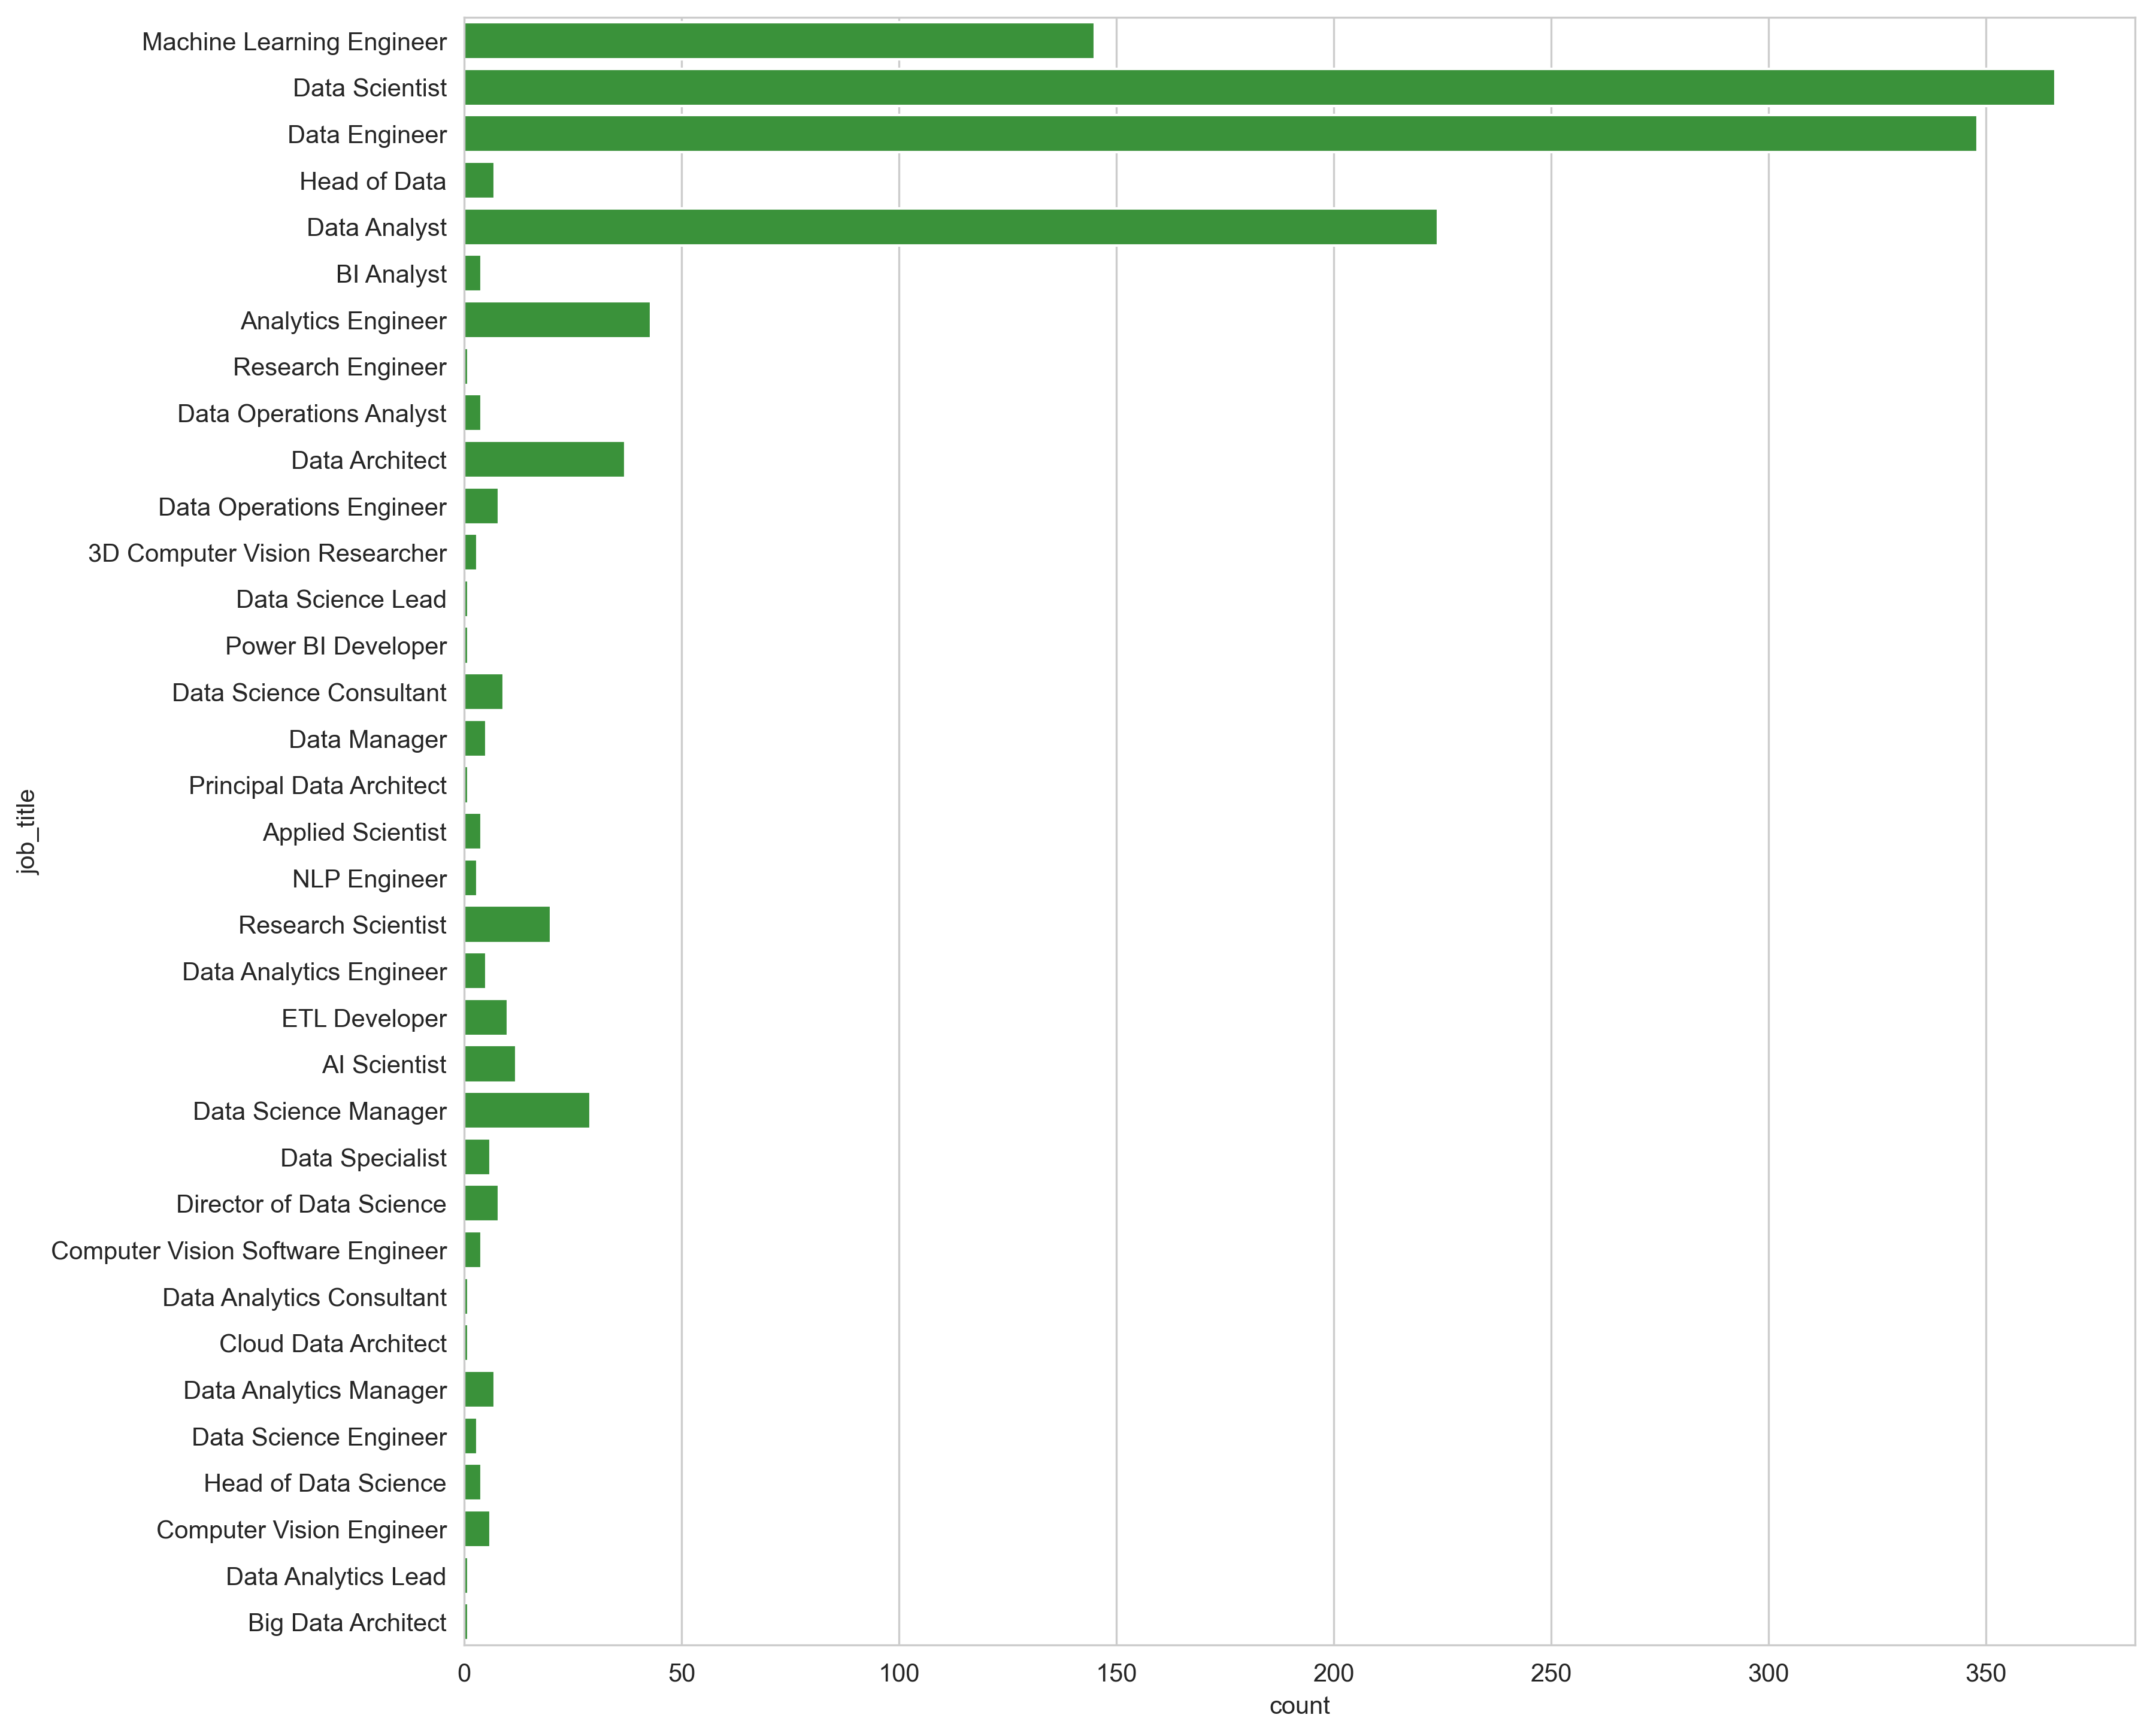

In [15]:
#Displaying the various job title_name entries 
sb.set_style('whitegrid')
plt.figure(figsize=[12,12], dpi=300)
default_color = sb.color_palette()[2]
sb.countplot(data=df_salaries_clean,color=default_color, y='job_title')
plt.show()